In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [2]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold'
})

In [3]:
df_s_65 = pd.read_csv('./simulation_3.0/h1_s_0.65.csv', index_col=0)
df_v_65 = pd.read_csv('./simulation_3.0/h1_v_0.65.csv', index_col=0)
df_x1_65 = pd.read_csv('./simulation_3.0/h1_x1_0.65.csv', index_col=0)
df_x2_65 = pd.read_csv('./simulation_3.0/h1_x2_0.65.csv', index_col=0)
df_x3_65 = pd.read_csv('./simulation_3.0/h1_x3_0.65.csv', index_col=0)

In [4]:
df_s_67 = pd.read_csv('./simulation_3.0/h1_s_0.67.csv', index_col=0)
df_v_67 = pd.read_csv('./simulation_3.0/h1_v_0.67.csv', index_col=0)
df_x1_67 = pd.read_csv('./simulation_3.0/h1_x1_0.67.csv', index_col=0)
df_x2_67 = pd.read_csv('./simulation_3.0/h1_x2_0.67.csv', index_col=0)
df_x3_67 = pd.read_csv('./simulation_3.0/h1_x3_0.67.csv', index_col=0)

In [5]:
df_s_69 = pd.read_csv('./simulation_3.0/h1_s_0.69.csv', index_col=0)
df_v_69 = pd.read_csv('./simulation_3.0/h1_v_0.69.csv', index_col=0)
df_x1_69 = pd.read_csv('./simulation_3.0/h1_x1_0.69.csv', index_col=0)
df_x2_69 = pd.read_csv('./simulation_3.0/h1_x2_0.69.csv', index_col=0)
df_x3_69 = pd.read_csv('./simulation_3.0/h1_x3_0.69.csv', index_col=0)

In [6]:
num_sims = df_x1_65.shape[1]

In [7]:
# Define the colors for the gradient
blue_colors = ['#FFFFFF', '#0047AB']
purple_colors = ['#FFFFFF', '#6C3BAA']
red_colors = ['#FFFFFF', '#C54B8C']
orange_colors = ['#FFFFFF', '#E35336']
green_colors = ['#FFFFFF', '#069494']

# Create a colormap
cmap_Bu = LinearSegmentedColormap.from_list('blue', blue_colors)
cmap_Pu = LinearSegmentedColormap.from_list('purple', purple_colors)
cmap_Rd = LinearSegmentedColormap.from_list('red', red_colors)
cmap_Or = LinearSegmentedColormap.from_list('orange', orange_colors)
cmap_Gr = LinearSegmentedColormap.from_list('green', green_colors)

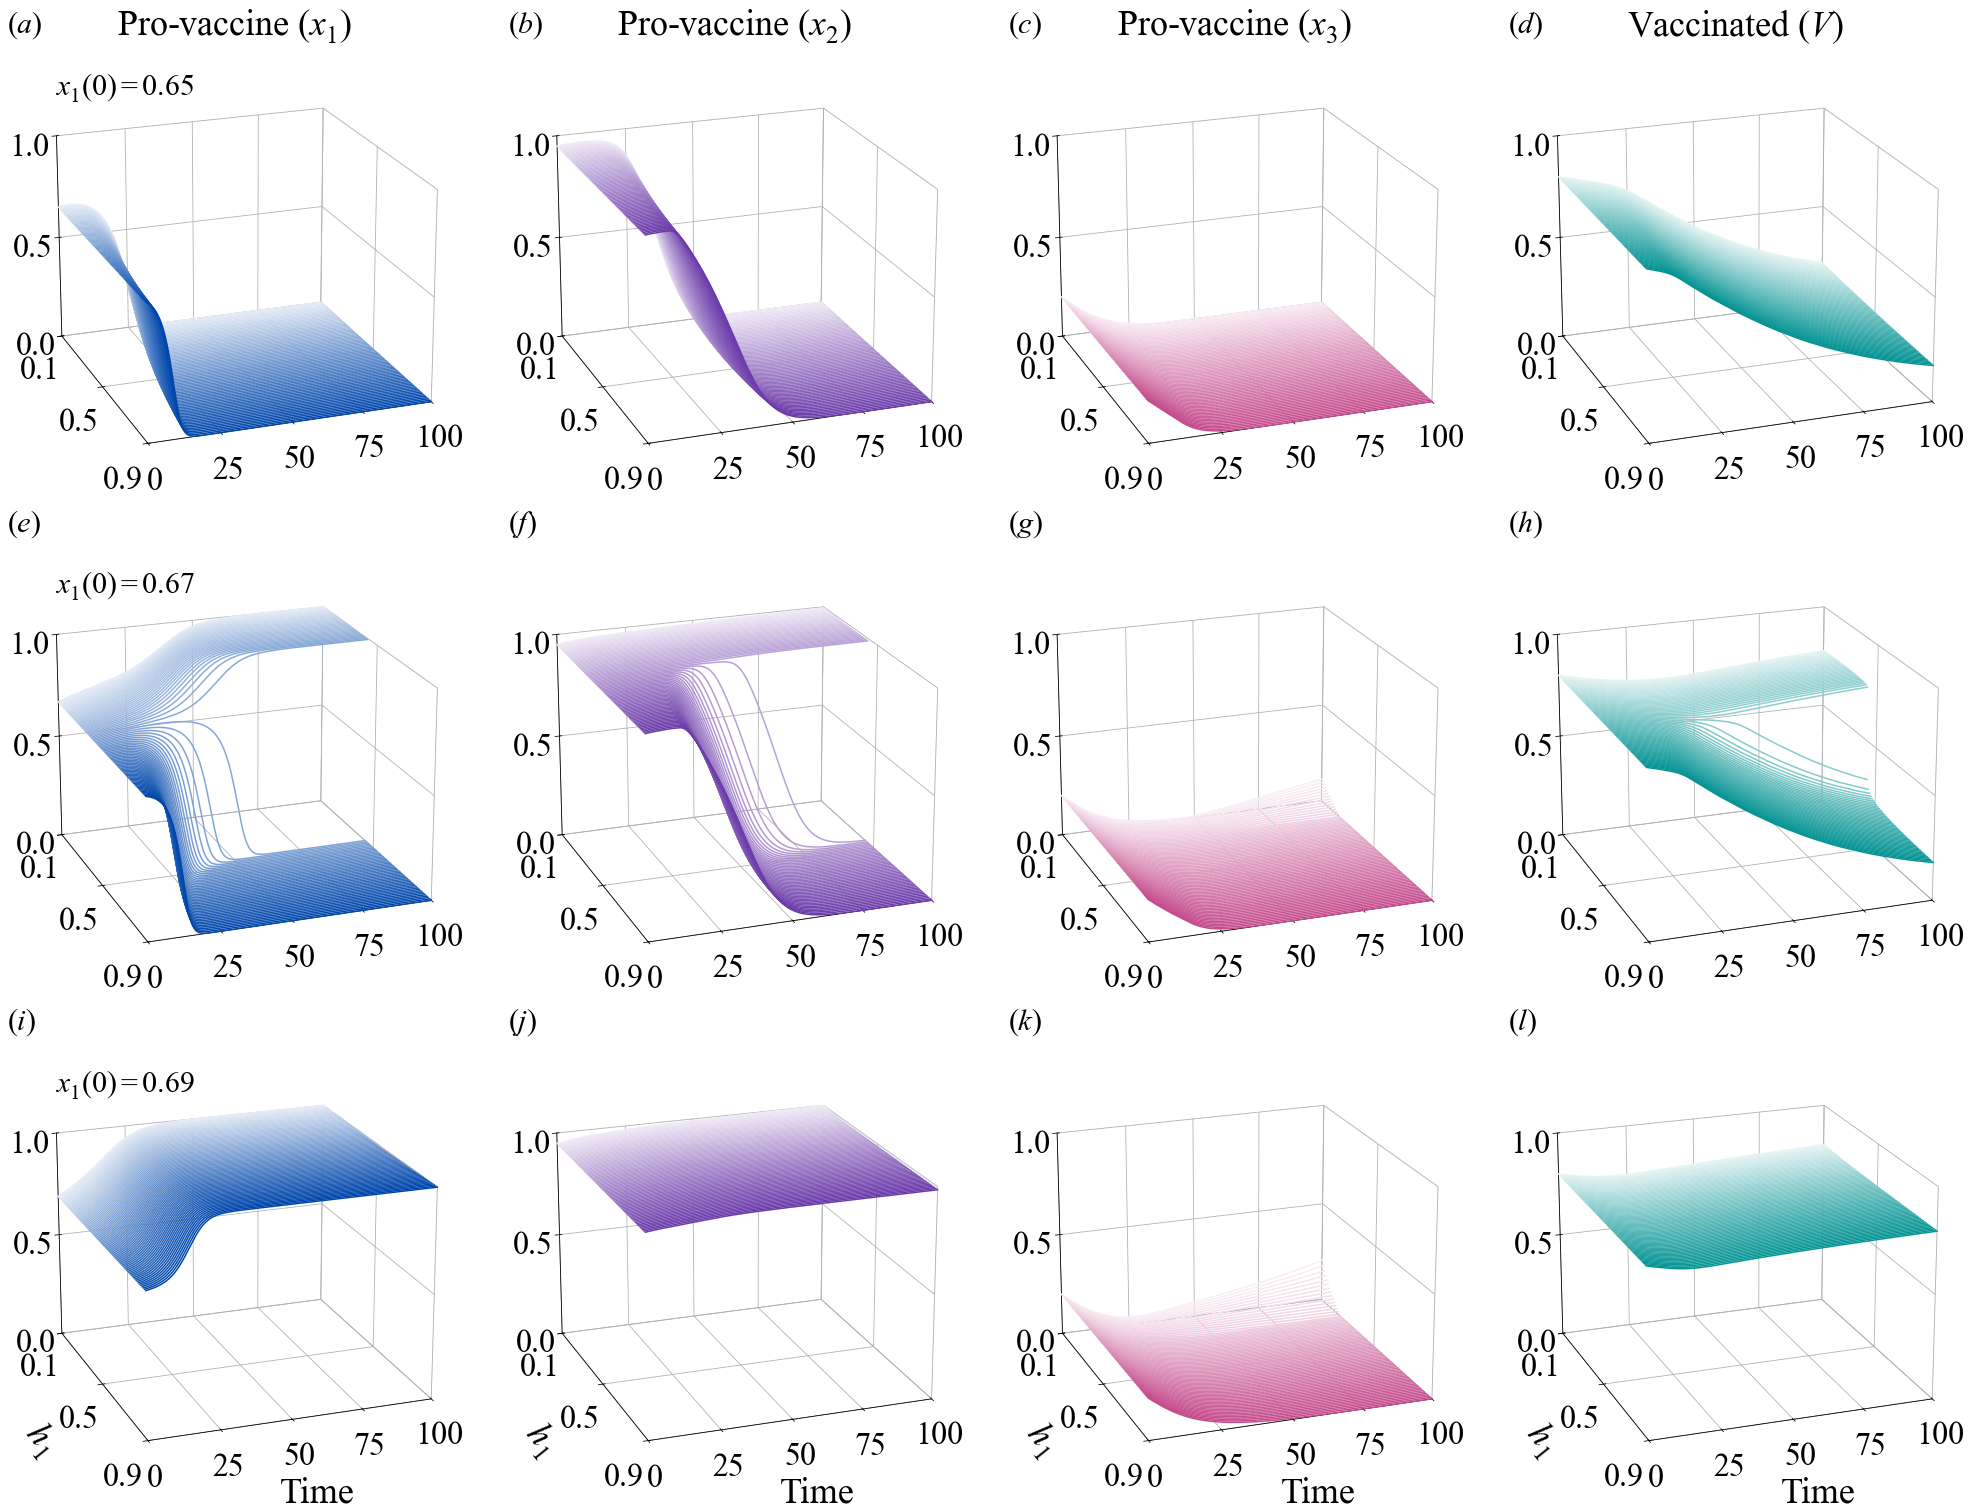

In [8]:
# Setup
fig = plt.figure(figsize=(28, 21))
gs = gridspec.GridSpec(3, 4, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1])

dataframes = [
    df_x1_65, df_x2_65, df_x3_65, df_v_65,
    df_x1_67, df_x2_67, df_x3_67, df_v_67,
    df_x1_69, df_x2_69, df_x3_69, df_v_69
]

zlabels = [r'Pro-vaccine ($x_1$)', r'Pro-vaccine ($x_2$)', r'Pro-vaccine ($x_3$)', r'Vaccinated ($V$)']

cmaps = [
    cmap_Bu, cmap_Pu, cmap_Rd, cmap_Gr,
    cmap_Bu, cmap_Pu, cmap_Rd, cmap_Gr,
    cmap_Bu, cmap_Pu, cmap_Rd, cmap_Gr
]

letters = list('abcdefghijkl')

h = [0.1 + 0.01*i for i in range(num_sims)]

for idx in range(12):
    ax = fig.add_subplot(gs[idx], projection='3d')
    ax.view_init(elev=20, azim=-20, roll=0)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.zaxis.set_ticks_position('lower')
    ax.zaxis.set_label_position('lower')

    df = dataframes[idx]
    colors = cmaps[idx](np.linspace(0.1, 1, num_sims))

    for i, param in enumerate(h):
        ax.plot(np.full_like(df.index, param), df.index, df.iloc[:, i], color=colors[i])

    if idx < 4:
        ax.set_title(zlabels[idx], fontsize=36)

    if idx >= 8:
        ax.set_xlabel(r'$h_1$', fontsize=36, labelpad=32)
        ax.set_ylabel('Time', fontsize=36, labelpad=32)

    ax.tick_params(axis='x', which='major', labelsize=32, pad=12)
    ax.tick_params(axis='y', which='major', labelsize=32, pad=8)
    ax.tick_params(axis='z', which='major', labelsize=32, pad=10)

    ax.set_xlim([0.1, 0.9])
    ax.set_ylim([0, 100])
    ax.set_xticks([0.1, 0.5, 0.9])
    ax.set_yticks([0, 25, 50, 75, 100])
    ax.set_zlim([0, 1])
    ax.set_zticks([0, 0.5, 1])

    ax.text2D(0, 1.03, '('+r'$\it{'+letters[idx]+r'}$'+')', transform=ax.transAxes, size=30)

    if idx == 0:
        ax.text(0.1, 0, 1.2, r'$x_1(0)=0.65$', fontsize=30)
    elif idx == 4:
        ax.text(0.1, 0, 1.2, r'$x_1(0)=0.67$', fontsize=30)
    elif idx == 8:
        ax.text(0.1, 0, 1.2, r'$x_1(0)=0.69$', fontsize=30)

plt.tight_layout()
#plt.savefig('./figures/h1_null.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/h1_null.eps', format='eps', bbox_inches='tight')
plt.show()

In [9]:
df_x1_1 = pd.read_csv('./simulation_3.0/h2h3_x1_0.67.csv', index_col=0)
df_x2_1 = pd.read_csv('./simulation_3.0/h2h3_x2_0.67.csv', index_col=0)
df_x3_1 = pd.read_csv('./simulation_3.0/h2h3_x3_0.67.csv', index_col=0)

df_x1_2 = pd.read_csv('./simulation_3.0/h2h3_x1_0.69.csv', index_col=0)
df_x2_2 = pd.read_csv('./simulation_3.0/h2h3_x2_0.69.csv', index_col=0)
df_x3_2 = pd.read_csv('./simulation_3.0/h2h3_x3_0.69.csv', index_col=0)

In [10]:
h_vals = [f"{x:.2f}" for x in np.arange(0.1, 0.91, 0.01)]

# Final percentage
heatmap1 = pd.DataFrame(index=h_vals, columns=h_vals)  # index: h2, column: h3
heatmap2 = pd.DataFrame(index=h_vals, columns=h_vals)

for h2 in h_vals:
    for h3 in h_vals:
        col_name = f"h2_{h2}_h3_{h3}"
        series1 = df_x1_1[col_name]
        series2 = df_x2_1[col_name]
        series3 = df_x3_1[col_name]
        series4 = df_x1_2[col_name]
        series5 = df_x2_2[col_name]
        series6 = df_x3_2[col_name]
        heatmap1.at[h2, h3] = series1.iloc[-1]*0.8 + series2.iloc[-1]*0.1 + series3.iloc[-1]*0.1
        heatmap2.at[h2, h3] = series4.iloc[-1]*0.8 + series5.iloc[-1]*0.1 + series6.iloc[-1]*0.1

heatmap1 = heatmap1.astype(float)
heatmap2 = heatmap2.astype(float)

In [11]:
#df_x1_1 = df_x1_1[df_x1_1.index <= 100]
#df_x2_1 = df_x2_1[df_x2_1.index <= 100]
#df_x3_1 = df_x3_1[df_x3_1.index <= 100]

#df_x1_2 = df_x1_2[df_x1_2.index <= 100]
#df_x2_2 = df_x2_2[df_x2_2.index <= 100]
#df_x3_2 = df_x3_2[df_x3_2.index <= 100]

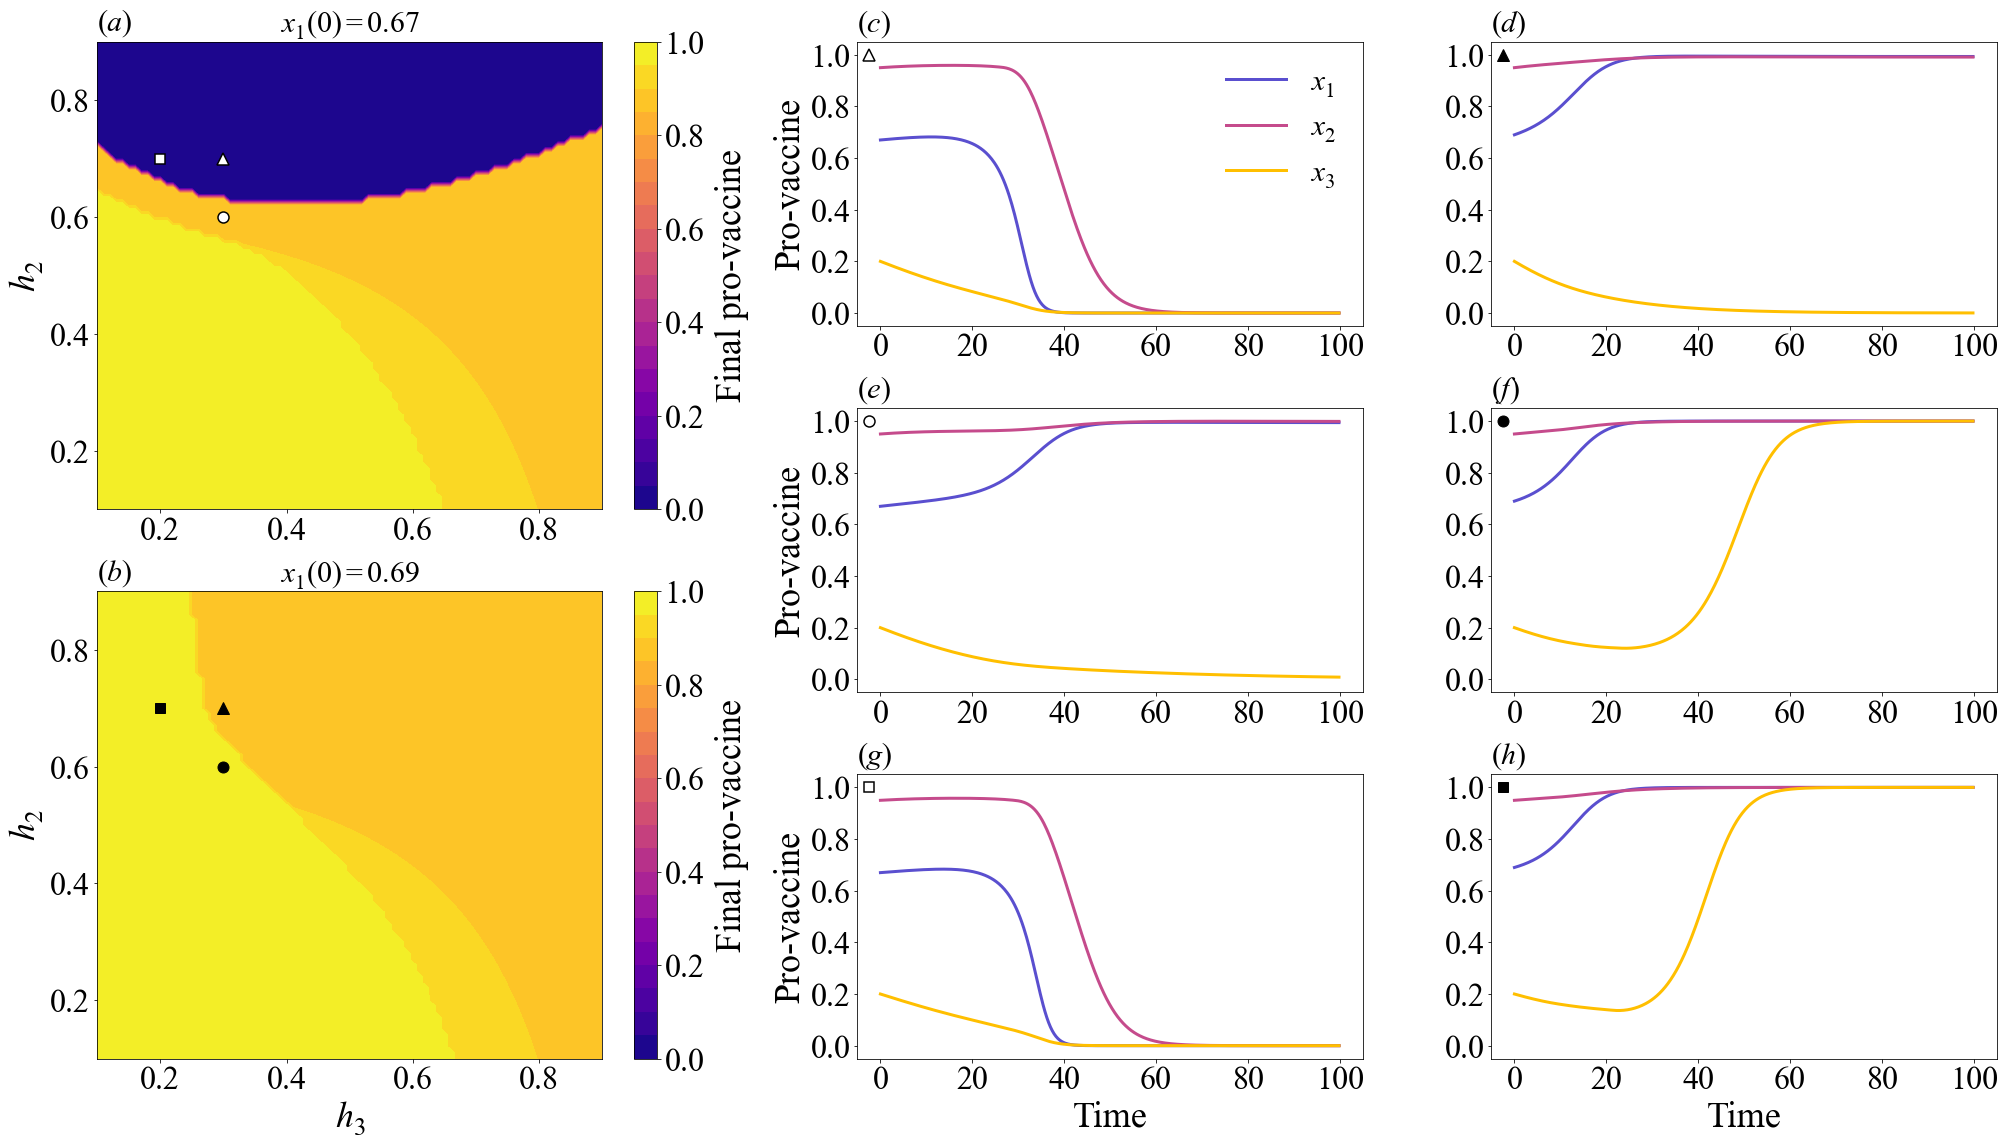

In [12]:
fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(6, 3, width_ratios=[5, 4, 4], figure=fig)

ax1 = fig.add_subplot(gs[0:3, 0])
ax2 = fig.add_subplot(gs[3:6, 0])

ax3 = fig.add_subplot(gs[0:2, 1])
ax4 = fig.add_subplot(gs[2:4, 1])
ax5 = fig.add_subplot(gs[4:6, 1])

ax6 = fig.add_subplot(gs[0:2, 2])
ax7 = fig.add_subplot(gs[2:4, 2])
ax8 = fig.add_subplot(gs[4:6, 2])

#levels = np.linspace(0, 1, 11)
#midpoints = (levels[:-1] + levels[1:]) / 2
#cmap = mpl.colormaps['plasma']
#cmap = cmap(midpoints)
#cmap = ListedColormap(cmap)
#norm = BoundaryNorm(levels, ncolors=cmap.N)

X, Y = np.meshgrid(heatmap1.columns.astype(float), heatmap1.index.astype(float))
im1 = ax1.contourf(X, Y, heatmap1.values, levels=np.linspace(0, 1, 21), cmap=cm.plasma)
#im1 = ax1.imshow(heatmap1.values, origin='lower', vmin=0, vmax=1, extent=[0.1, 0.9, 0.1, 0.9], cmap=cm.plasma, aspect='auto')
ax1.set_ylabel(r'$h_2$', fontsize=36)
ax1.set_xticks([0.2, 0.4, 0.6, 0.8])  # 0.1*i for i in range(10)
ax1.set_yticks([0.2, 0.4, 0.6, 0.8])  # 0.2, 0.4, 0.6, 0.8
ax1.set_title(r'$x_1(0)=0.67$', fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=32)
cbar1 = fig.colorbar(im1, ax=ax1, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
cbar1.ax.tick_params(labelsize=32)
cbar1.set_label('Final pro-vaccine', fontsize=36, labelpad=10)
ax1.text(0, 1.025, '('+r'$\it{a}$'+')', transform=ax1.transAxes, size=30)

# Add marks
ax1.plot(0.3, 0.7, marker='^', markersize=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5)
ax1.plot(0.3, 0.6, marker='o', markersize=11, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5)
ax1.plot(0.2, 0.7, marker='s', markersize=10, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5)

X, Y = np.meshgrid(heatmap2.columns.astype(float), heatmap2.index.astype(float))
im2 = ax2.contourf(X, Y, heatmap2.values, levels=np.linspace(0, 1, 21), cmap=cm.plasma)
#im2 = ax2.imshow(heatmap2.values, origin='lower', vmin=0, vmax=1, extent=[0.1, 0.9, 0.1, 0.9], cmap=cm.plasma, aspect='auto')
ax2.set_xlabel(r'$h_3$', fontsize=36)
ax2.set_ylabel(r'$h_2$', fontsize=36)
ax2.set_xticks([0.2, 0.4, 0.6, 0.8])
ax2.set_yticks([0.2, 0.4, 0.6, 0.8])
ax2.set_title(r'$x_1(0)=0.69$', fontsize=30)
ax2.tick_params(axis='both', which='major', labelsize=32)
cbar2 = fig.colorbar(im2, ax=ax2, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
cbar2.ax.tick_params(labelsize=32)
cbar2.set_label('Final pro-vaccine', fontsize=36, labelpad=10)
ax2.text(0, 1.025, '('+r'$\it{b}$'+')', transform=ax2.transAxes, size=30)

# Add marks
ax2.plot(0.3, 0.7, marker='^', markersize=12, color='black')
ax2.plot(0.3, 0.6, marker='o', markersize=11, color='black')
ax2.plot(0.2, 0.7, marker='s', markersize=10, color='black')


# h2 = 0.7, h3 = 0.3
ax3.plot(df_x1_1.index[:500], df_x1_1['h2_0.70_h3_0.30'][:100], linewidth=3, label=r'$x_1$', color='#5A4FCF')
ax3.plot(df_x1_1.index[:500], df_x2_1['h2_0.70_h3_0.30'][:100], linewidth=3, label=r'$x_2$', color='#C54B8C')
ax3.plot(df_x1_1.index[:500], df_x3_1['h2_0.70_h3_0.30'][:100], linewidth=3, label=r'$x_3$', color='#FFBF00')
ax3.set_ylabel('Pro-vaccine', fontsize=36)
ax3.set_xlim(-5, 105)
ax3.set_ylim(-0.05, 1.05)
ax3.set_xticks([0, 20, 40, 60, 80, 100])
ax3.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax3.tick_params(axis='both', which='major', labelsize=32)
ax3.legend(fontsize=30, frameon=False)
ax3.text(0, 1.04, '('+r'$\it{c}$'+')', transform=ax3.transAxes, size=30)
ax3.plot(-2.5, 1, marker='^', markersize=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5)

# h2 = 0.6, h3 = 0.25
ax4.plot(df_x1_1.index[:500], df_x1_1['h2_0.60_h3_0.30'][:100], linewidth=3, label=r'$x_1$', color='#5A4FCF')
ax4.plot(df_x1_1.index[:500], df_x2_1['h2_0.60_h3_0.30'][:100], linewidth=3, label=r'$x_2$', color='#C54B8C')
ax4.plot(df_x1_1.index[:500], df_x3_1['h2_0.60_h3_0.30'][:100], linewidth=3, label=r'$x_3$', color='#FFBF00')
ax4.set_ylabel('Pro-vaccine', fontsize=36)
ax4.set_xlim(-5, 105)
ax4.set_ylim(-0.05, 1.05)
ax4.set_xticks([0, 20, 40, 60, 80, 100])
ax4.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax4.tick_params(axis='both', which='major', labelsize=32)
ax4.text(0, 1.04, '('+r'$\it{e}$'+')', transform=ax4.transAxes, size=30)
ax4.plot(-2.5, 1, marker='o', markersize=11, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5)

# h2 = 0.7, h3 = 0.2
ax5.plot(df_x1_1.index[:500], df_x1_1['h2_0.70_h3_0.20'][:100], linewidth=3, label=r'$x_1$', color='#5A4FCF')
ax5.plot(df_x1_1.index[:500], df_x2_1['h2_0.70_h3_0.20'][:100], linewidth=3, label=r'$x_2$', color='#C54B8C')
ax5.plot(df_x1_1.index[:500], df_x3_1['h2_0.70_h3_0.20'][:100], linewidth=3, label=r'$x_3$', color='#FFBF00')
ax5.set_xlabel('Time', fontsize=36)
ax5.set_ylabel('Pro-vaccine', fontsize=36)
ax5.set_xlim(-5, 105)
ax5.set_ylim(-0.05, 1.05)
ax5.set_xticks([0, 20, 40, 60, 80, 100])
ax5.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax5.tick_params(axis='both', which='major', labelsize=32)
ax5.text(0, 1.04, '('+r'$\it{g}$'+')', transform=ax5.transAxes, size=30)
ax5.plot(-2.5, 1, marker='s', markersize=10, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5)

# h2 = 0.7, h3 = 0.3
ax6.plot(df_x1_2.index[:500], df_x1_2['h2_0.70_h3_0.70'][:100], linewidth=3, label=r'$x_1$', color='#5A4FCF')
ax6.plot(df_x1_2.index[:500], df_x2_2['h2_0.70_h3_0.70'][:100], linewidth=3, label=r'$x_2$', color='#C54B8C')
ax6.plot(df_x1_2.index[:500], df_x3_2['h2_0.70_h3_0.70'][:100], linewidth=3, label=r'$x_3$', color='#FFBF00')
ax6.set_xlim(-5, 105)
ax6.set_ylim(-0.05, 1.05)
ax6.set_xticks([0, 20, 40, 60, 80, 100])
ax6.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax6.tick_params(axis='both', which='major', labelsize=32)
ax6.text(0, 1.04, '('+r'$\it{d}$'+')', transform=ax6.transAxes, size=30)
ax6.plot(-2.5, 1, marker='^', markersize=12, color='black')

# h2 = 0.6, h3 = 0.25
ax7.plot(df_x1_2.index[:500], df_x1_2['h2_0.60_h3_0.30'][:100], linewidth=3, label=r'$x_1$', color='#5A4FCF')
ax7.plot(df_x1_2.index[:500], df_x2_2['h2_0.60_h3_0.30'][:100], linewidth=3, label=r'$x_2$', color='#C54B8C')
ax7.plot(df_x1_2.index[:500], df_x3_2['h2_0.60_h3_0.30'][:100], linewidth=3, label=r'$x_3$', color='#FFBF00')
ax7.set_xlim(-5, 105)
ax7.set_ylim(-0.05, 1.05)
ax7.set_xticks([0, 20, 40, 60, 80, 100])
ax7.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax7.tick_params(axis='both', which='major', labelsize=32)
ax7.text(0, 1.04, '('+r'$\it{f}$'+')', transform=ax7.transAxes, size=30)
ax7.plot(-2.5, 1, marker='o', markersize=11, color='black')

# h2 = 0.7, h3 = 0.2
ax8.plot(df_x1_2.index[:500], df_x1_2['h2_0.70_h3_0.20'][:100], linewidth=3, label=r'$x_1$', color='#5A4FCF')
ax8.plot(df_x1_2.index[:500], df_x2_2['h2_0.70_h3_0.20'][:100], linewidth=3, label=r'$x_2$', color='#C54B8C')
ax8.plot(df_x1_2.index[:500], df_x3_2['h2_0.70_h3_0.20'][:100], linewidth=3, label=r'$x_3$', color='#FFBF00')
ax8.set_xlabel('Time', fontsize=36)
ax8.set_xlim(-5, 105)
ax8.set_ylim(-0.05, 1.05)
ax8.set_xticks([0, 20, 40, 60, 80, 100])
ax8.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax8.tick_params(axis='both', which='major', labelsize=32)
ax8.text(0, 1.04, '('+r'$\it{h}$'+')', transform=ax8.transAxes, size=30)
ax8.plot(-2.5, 1, marker='s', markersize=10, color='black')

#ax1.grid()
#ax2.grid()

plt.tight_layout()
#plt.savefig('./figures/h2h3_null.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/h2h3_null.eps', format='eps', bbox_inches='tight')
plt.show()

In [13]:
df_de_i_1 = pd.read_csv('./simulation_3.0/logistic_de_i_0.65.csv', index_col=0)
df_de_x1_1 = pd.read_csv('./simulation_3.0/logistic_de_x1_0.65.csv', index_col=0)
df_de_x2_1 = pd.read_csv('./simulation_3.0/logistic_de_x2_0.65.csv', index_col=0)
df_de_x3_1 = pd.read_csv('./simulation_3.0/logistic_de_x3_0.65.csv', index_col=0)

df_de_i_2 = pd.read_csv('./simulation_3.0/logistic_de_i_0.67.csv', index_col=0)
df_de_x1_2 = pd.read_csv('./simulation_3.0/logistic_de_x1_0.67.csv', index_col=0)
df_de_x2_2 = pd.read_csv('./simulation_3.0/logistic_de_x2_0.67.csv', index_col=0)
df_de_x3_2 = pd.read_csv('./simulation_3.0/logistic_de_x3_0.67.csv', index_col=0)

df_de_i_3 = pd.read_csv('./simulation_3.0/logistic_de_i_0.69.csv', index_col=0)
df_de_x1_3 = pd.read_csv('./simulation_3.0/logistic_de_x1_0.69.csv', index_col=0)
df_de_x2_3 = pd.read_csv('./simulation_3.0/logistic_de_x2_0.69.csv', index_col=0)
df_de_x3_3 = pd.read_csv('./simulation_3.0/logistic_de_x3_0.69.csv', index_col=0)

In [14]:
df_in_i_1 = pd.read_csv('./simulation_3.0/logistic_in_i_0.65.csv', index_col=0)
df_in_x1_1 = pd.read_csv('./simulation_3.0/logistic_in_x1_0.65.csv', index_col=0)
df_in_x2_1 = pd.read_csv('./simulation_3.0/logistic_in_x2_0.65.csv', index_col=0)
df_in_x3_1 = pd.read_csv('./simulation_3.0/logistic_in_x3_0.65.csv', index_col=0)

df_in_i_2 = pd.read_csv('./simulation_3.0/logistic_in_i_0.67.csv', index_col=0)
df_in_x1_2 = pd.read_csv('./simulation_3.0/logistic_in_x1_0.67.csv', index_col=0)
df_in_x2_2 = pd.read_csv('./simulation_3.0/logistic_in_x2_0.67.csv', index_col=0)
df_in_x3_2 = pd.read_csv('./simulation_3.0/logistic_in_x3_0.67.csv', index_col=0)

df_in_i_3 = pd.read_csv('./simulation_3.0/logistic_in_i_0.69.csv', index_col=0)
df_in_x1_3 = pd.read_csv('./simulation_3.0/logistic_in_x1_0.69.csv', index_col=0)
df_in_x2_3 = pd.read_csv('./simulation_3.0/logistic_in_x2_0.69.csv', index_col=0)
df_in_x3_3 = pd.read_csv('./simulation_3.0/logistic_in_x3_0.69.csv', index_col=0)

In [15]:
def logistic_de(t, h_bi, alpha, L):
    return 2 * (h_bi - L) / (1 + np.exp(alpha * t)) + L

In [16]:
def logistic_in(t, h_bi, alpha, L):
    return 2 * (L - h_bi) / (1 + np.exp(-alpha * t)) + 2*h_bi - L

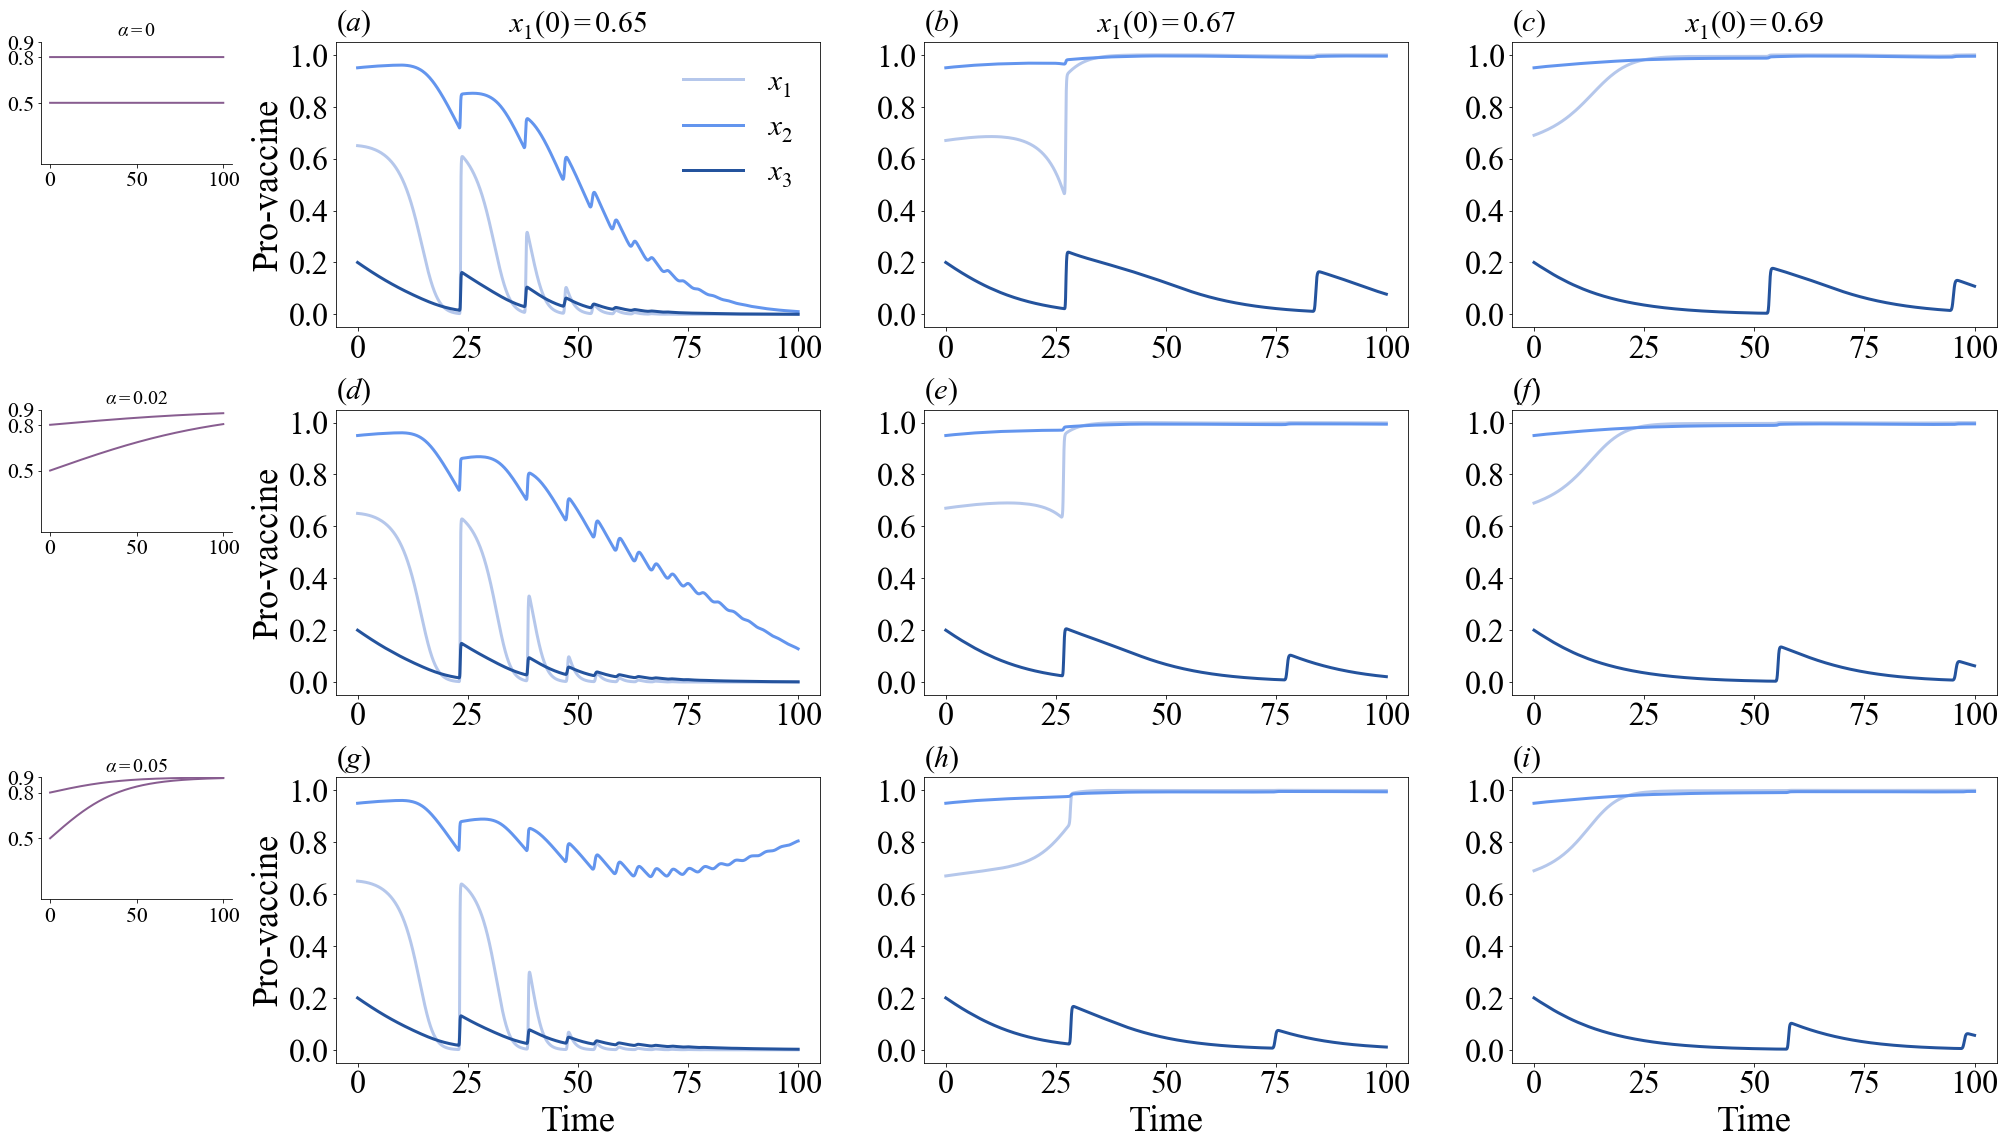

In [17]:
fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(6, 7, height_ratios=[6, 4, 6, 4, 6, 4], figure=fig)

t = np.linspace(0, 100, 5000)
h_b = [0.5, 0.8]

ax1 = fig.add_subplot(gs[0:2, 1:3])
ax1.plot(t, df_in_x1_1['alpha_0.00'][:100], linewidth=3, color='#B5C7EB')
ax1.plot(t, df_in_x2_1['alpha_0.00'][:100], linewidth=3, color='#6395EE')
ax1.plot(t, df_in_x3_1['alpha_0.00'][:100], linewidth=3, color='#24539D')

ax2 = fig.add_subplot(gs[0:2, 3:5])
ax2.plot(t, df_in_x1_2['alpha_0.00'][:100], linewidth=3, color='#B5C7EB')
ax2.plot(t, df_in_x2_2['alpha_0.00'][:100], linewidth=3, color='#6395EE')
ax2.plot(t, df_in_x3_2['alpha_0.00'][:100], linewidth=3, color='#24539D')

ax3 = fig.add_subplot(gs[0:2, 5:7])
ax3.plot(t, df_in_x1_3['alpha_0.00'][:100], linewidth=3, color='#B5C7EB')
ax3.plot(t, df_in_x2_3['alpha_0.00'][:100], linewidth=3, color='#6395EE')
ax3.plot(t, df_in_x3_3['alpha_0.00'][:100], linewidth=3, color='#24539D')

ax4 = fig.add_subplot(gs[2:4, 1:3])
ax4.plot(t, df_in_x1_1['alpha_0.02'][:100], linewidth=3, color='#B5C7EB')
ax4.plot(t, df_in_x2_1['alpha_0.02'][:100], linewidth=3, color='#6395EE')
ax4.plot(t, df_in_x3_1['alpha_0.02'][:100], linewidth=3, color='#24539D')

ax5 = fig.add_subplot(gs[2:4, 3:5])
ax5.plot(t, df_in_x1_2['alpha_0.02'][:100], linewidth=3, color='#B5C7EB')
ax5.plot(t, df_in_x2_2['alpha_0.02'][:100], linewidth=3, color='#6395EE')
ax5.plot(t, df_in_x3_2['alpha_0.02'][:100], linewidth=3, color='#24539D')

ax6 = fig.add_subplot(gs[2:4, 5:7])
ax6.plot(t, df_in_x1_3['alpha_0.02'][:100], linewidth=3, color='#B5C7EB')
ax6.plot(t, df_in_x2_3['alpha_0.02'][:100], linewidth=3, color='#6395EE')
ax6.plot(t, df_in_x3_3['alpha_0.02'][:100], linewidth=3, color='#24539D')

ax7 = fig.add_subplot(gs[4:6, 1:3])
ax7.plot(t, df_in_x1_1['alpha_0.05'][:100], linewidth=3, color='#B5C7EB')
ax7.plot(t, df_in_x2_1['alpha_0.05'][:100], linewidth=3, color='#6395EE')
ax7.plot(t, df_in_x3_1['alpha_0.05'][:100], linewidth=3, color='#24539D')

ax8 = fig.add_subplot(gs[4:6, 3:5])
ax8.plot(t, df_in_x1_2['alpha_0.05'][:100], linewidth=3, color='#B5C7EB')
ax8.plot(t, df_in_x2_2['alpha_0.05'][:100], linewidth=3, color='#6395EE')
ax8.plot(t, df_in_x3_2['alpha_0.05'][:100], linewidth=3, color='#24539D')

ax9 = fig.add_subplot(gs[4:6, 5:7])
ax9.plot(t, df_in_x1_3['alpha_0.05'][:100], linewidth=3, color='#B5C7EB')
ax9.plot(t, df_in_x2_3['alpha_0.05'][:100], linewidth=3, color='#6395EE')
ax9.plot(t, df_in_x3_3['alpha_0.05'][:100], linewidth=3, color='#24539D')

ax1.set_title(r'$x_1(0)=0.65$', fontsize=30)
ax2.set_title(r'$x_1(0)=0.67$', fontsize=30)
ax3.set_title(r'$x_1(0)=0.69$', fontsize=30)

ax1.set_ylabel(r'Pro-vaccine', fontsize=36)
ax4.set_ylabel(r'Pro-vaccine', fontsize=36)
ax7.set_ylabel(r'Pro-vaccine', fontsize=36)

ax7.set_xlabel('Time', fontsize=36)
ax8.set_xlabel('Time', fontsize=36)
ax9.set_xlabel('Time', fontsize=36)

#ax1ins = inset_axes(ax1, width="100%", height="100%", loc='upper right', bbox_to_anchor=(-.6, .6, .4, .4), bbox_transform=ax1.transAxes)
#ax4ins = inset_axes(ax4, width="100%", height="100%", loc='upper right', bbox_to_anchor=(-.6, .6, .4, .4), bbox_transform=ax4.transAxes)
#ax7ins = inset_axes(ax7, width="100%", height="100%", loc='upper right', bbox_to_anchor=(-.6, .6, .4, .4), bbox_transform=ax7.transAxes)
ax1ins = fig.add_subplot(gs[0:1, 0:1])
ax4ins = fig.add_subplot(gs[2:3, 0:1])
ax7ins = fig.add_subplot(gs[4:5, 0:1])
for hb in h_b:
    ax1ins.plot(t, logistic_in(t, hb, 0, 0.9), linewidth=2, color='#885D90')
    ax4ins.plot(t, logistic_in(t, hb, 0.02, 0.9), linewidth=2, color='#885D90')
    ax7ins.plot(t, logistic_in(t, hb, 0.05, 0.9), linewidth=2, color='#885D90')
ax1ins.set_ylim(0.1, 0.9)
ax4ins.set_ylim(0.1, 0.9)
ax7ins.set_ylim(0.1, 0.9)
ax1ins.set_xticks([0, 50, 100])
ax4ins.set_xticks([0, 50, 100])
ax7ins.set_xticks([0, 50, 100])
ax1ins.set_yticks([0.5, 0.8, 0.9])
ax4ins.set_yticks([0.5, 0.8, 0.9])
ax7ins.set_yticks([0.5, 0.8, 0.9])
ax1ins.tick_params(axis='both', which='major', labelsize=22)
ax4ins.tick_params(axis='both', which='major', labelsize=22)
ax7ins.tick_params(axis='both', which='major', labelsize=22)
ax1ins.set_title(r'$\alpha=0$', size=20)
ax4ins.set_title(r'$\alpha=0.02$', size=20)
ax7ins.set_title(r'$\alpha=0.05$', size=20)
#ax1ins.text(100, 0.12, r'$\alpha=0$', size=20, horizontalalignment='right', verticalalignment='bottom')
#ax4ins.text(100, 0.12, r'$\alpha=0.02$', size=20, horizontalalignment='right', verticalalignment='bottom')
#ax7ins.text(100, 0.12, r'$\alpha=0.05$', size=20, horizontalalignment='right', verticalalignment='bottom')
ax1ins.spines[['right', 'top']].set_visible(False)
ax4ins.spines[['right', 'top']].set_visible(False)
ax7ins.spines[['right', 'top']].set_visible(False)

ax1.legend([r'$x_1$', r'$x_2$', r'$x_3$'], fontsize=30, frameon=False, loc='upper right')

ax1.set_ylim(-0.05, 1.05)
ax2.set_ylim(-0.05, 1.05)
ax3.set_ylim(-0.05, 1.05)
ax4.set_ylim(-0.05, 1.05)
ax5.set_ylim(-0.05, 1.05)
ax6.set_ylim(-0.05, 1.05)
ax7.set_ylim(-0.05, 1.05)
ax8.set_ylim(-0.05, 1.05)
ax9.set_ylim(-0.05, 1.05)

ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax3.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax4.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax5.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax6.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax7.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax8.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax9.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

ax1.tick_params(axis='both', which='major', labelsize=32)
ax2.tick_params(axis='both', which='major', labelsize=32)
ax3.tick_params(axis='both', which='major', labelsize=32)
ax4.tick_params(axis='both', which='major', labelsize=32)
ax5.tick_params(axis='both', which='major', labelsize=32)
ax6.tick_params(axis='both', which='major', labelsize=32)
ax7.tick_params(axis='both', which='major', labelsize=32)
ax8.tick_params(axis='both', which='major', labelsize=32)
ax9.tick_params(axis='both', which='major', labelsize=32)

ax1.text(0, 1.04, '('+r'$\it{a}$'+')', transform=ax1.transAxes, size=30)
ax2.text(0, 1.04, '('+r'$\it{b}$'+')', transform=ax2.transAxes, size=30)
ax3.text(0, 1.04, '('+r'$\it{c}$'+')', transform=ax3.transAxes, size=30)
ax4.text(0, 1.04, '('+r'$\it{d}$'+')', transform=ax4.transAxes, size=30)
ax5.text(0, 1.04, '('+r'$\it{e}$'+')', transform=ax5.transAxes, size=30)
ax6.text(0, 1.04, '('+r'$\it{f}$'+')', transform=ax6.transAxes, size=30)
ax7.text(0, 1.04, '('+r'$\it{g}$'+')', transform=ax7.transAxes, size=30)
ax8.text(0, 1.04, '('+r'$\it{h}$'+')', transform=ax8.transAxes, size=30)
ax9.text(0, 1.04, '('+r'$\it{i}$'+')', transform=ax9.transAxes, size=30)

plt.tight_layout()
#plt.savefig('./figures/logistic_in.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/logistic_in.eps', format='eps', bbox_inches='tight')
plt.show()

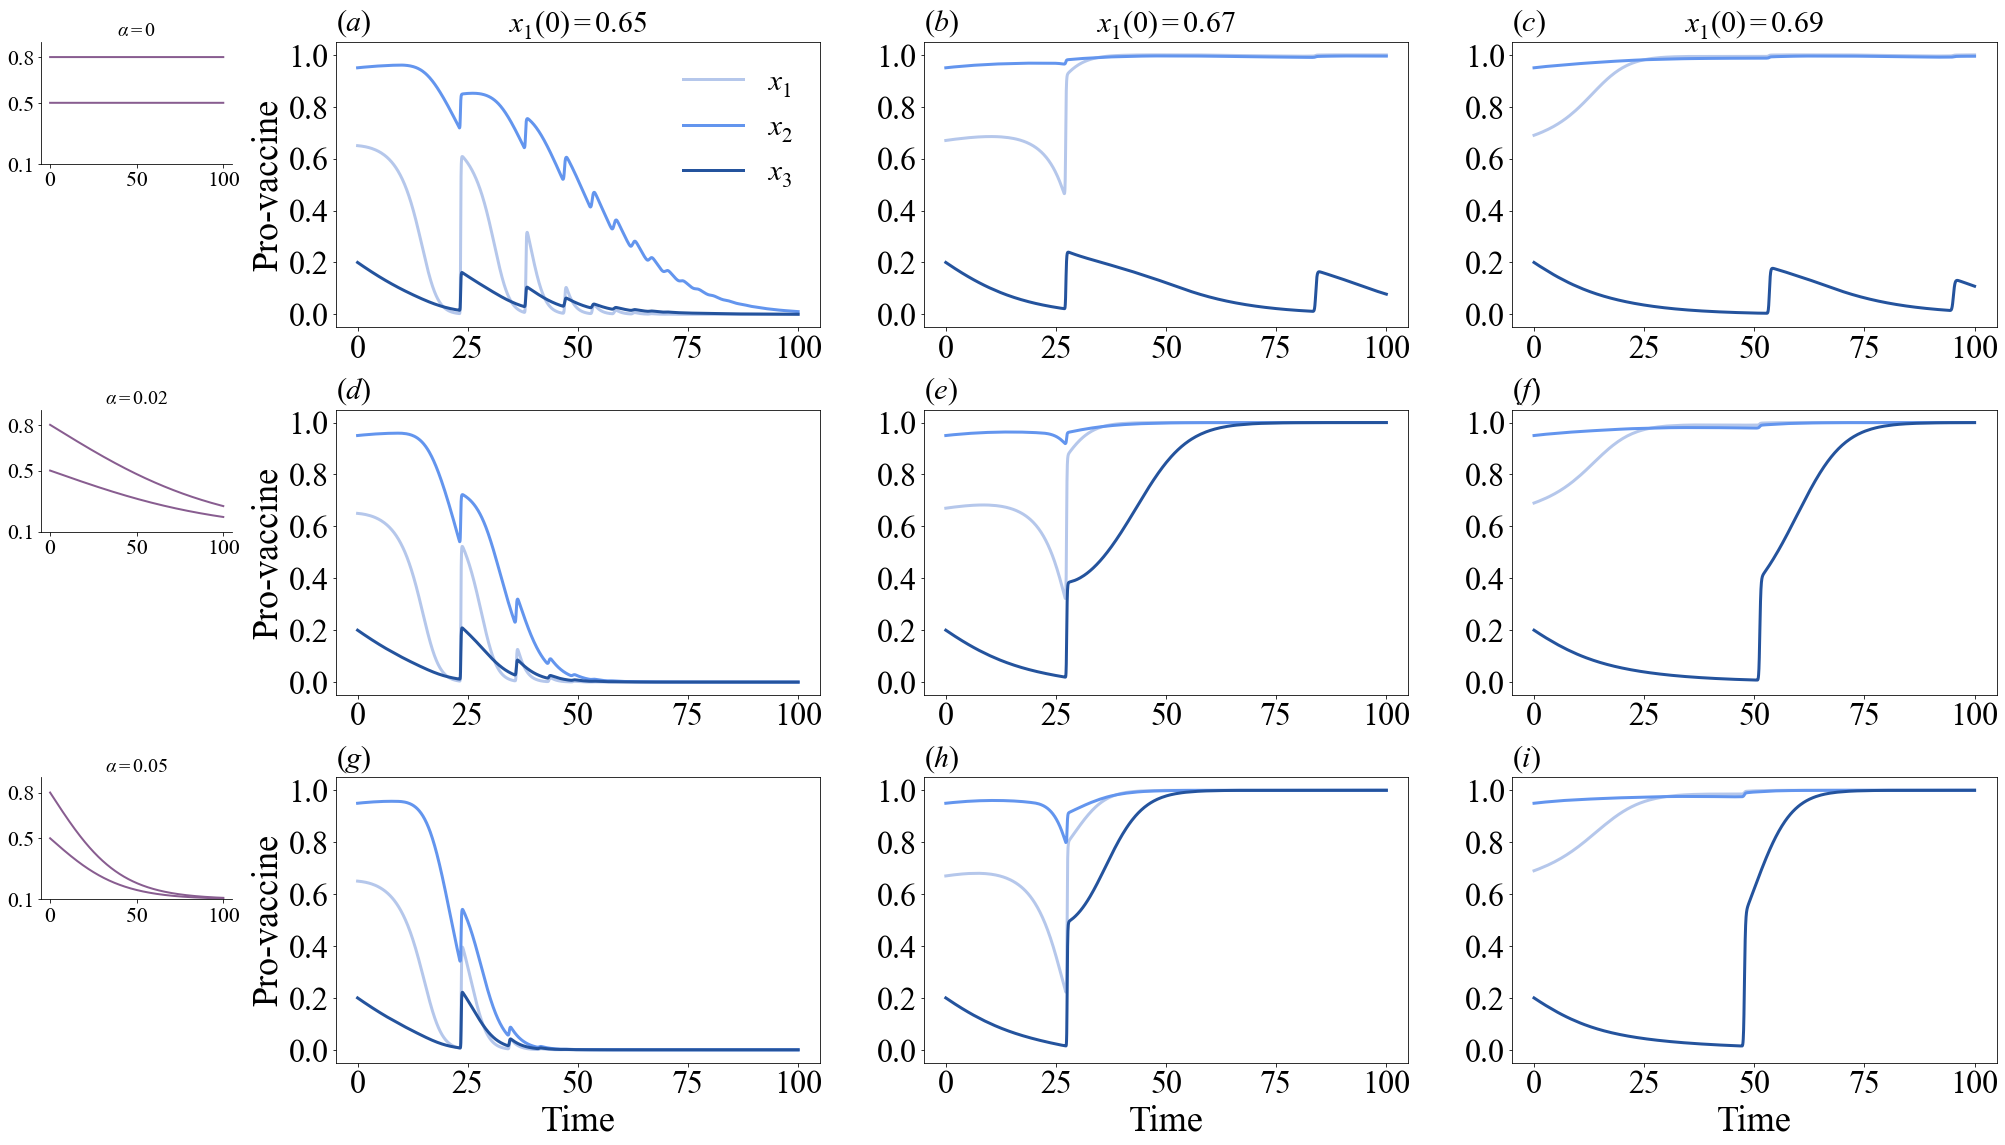

In [18]:
fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(6, 7, height_ratios=[6, 4, 6, 4, 6, 4], figure=fig)

t = np.linspace(0, 100, 5000)
h_b = [0.5, 0.8]

ax1 = fig.add_subplot(gs[0:2, 1:3])
ax1.plot(t, df_de_x1_1['alpha_0.00'][:100], linewidth=3, color='#B5C7EB')
ax1.plot(t, df_de_x2_1['alpha_0.00'][:100], linewidth=3, color='#6395EE')
ax1.plot(t, df_de_x3_1['alpha_0.00'][:100], linewidth=3, color='#24539D')

ax2 = fig.add_subplot(gs[0:2, 3:5])
ax2.plot(t, df_de_x1_2['alpha_0.00'][:100], linewidth=3, color='#B5C7EB')
ax2.plot(t, df_de_x2_2['alpha_0.00'][:100], linewidth=3, color='#6395EE')
ax2.plot(t, df_de_x3_2['alpha_0.00'][:100], linewidth=3, color='#24539D')

ax3 = fig.add_subplot(gs[0:2, 5:7])
ax3.plot(t, df_de_x1_3['alpha_0.00'][:100], linewidth=3, color='#B5C7EB')
ax3.plot(t, df_de_x2_3['alpha_0.00'][:100], linewidth=3, color='#6395EE')
ax3.plot(t, df_de_x3_3['alpha_0.00'][:100], linewidth=3, color='#24539D')

ax4 = fig.add_subplot(gs[2:4, 1:3])
ax4.plot(t, df_de_x1_1['alpha_0.02'][:100], linewidth=3, color='#B5C7EB')
ax4.plot(t, df_de_x2_1['alpha_0.02'][:100], linewidth=3, color='#6395EE')
ax4.plot(t, df_de_x3_1['alpha_0.02'][:100], linewidth=3, color='#24539D')

ax5 = fig.add_subplot(gs[2:4, 3:5])
ax5.plot(t, df_de_x1_2['alpha_0.02'][:100], linewidth=3, color='#B5C7EB')
ax5.plot(t, df_de_x2_2['alpha_0.02'][:100], linewidth=3, color='#6395EE')
ax5.plot(t, df_de_x3_2['alpha_0.02'][:100], linewidth=3, color='#24539D')

ax6 = fig.add_subplot(gs[2:4, 5:7])
ax6.plot(t, df_de_x1_3['alpha_0.02'][:100], linewidth=3, color='#B5C7EB')
ax6.plot(t, df_de_x2_3['alpha_0.02'][:100], linewidth=3, color='#6395EE')
ax6.plot(t, df_de_x3_3['alpha_0.02'][:100], linewidth=3, color='#24539D')

ax7 = fig.add_subplot(gs[4:6, 1:3])
ax7.plot(t, df_de_x1_1['alpha_0.05'][:100], linewidth=3, color='#B5C7EB')
ax7.plot(t, df_de_x2_1['alpha_0.05'][:100], linewidth=3, color='#6395EE')
ax7.plot(t, df_de_x3_1['alpha_0.05'][:100], linewidth=3, color='#24539D')

ax8 = fig.add_subplot(gs[4:6, 3:5])
ax8.plot(t, df_de_x1_2['alpha_0.05'][:100], linewidth=3, color='#B5C7EB')
ax8.plot(t, df_de_x2_2['alpha_0.05'][:100], linewidth=3, color='#6395EE')
ax8.plot(t, df_de_x3_2['alpha_0.05'][:100], linewidth=3, color='#24539D')

ax9 = fig.add_subplot(gs[4:6, 5:7])
ax9.plot(t, df_de_x1_3['alpha_0.05'][:100], linewidth=3, color='#B5C7EB')
ax9.plot(t, df_de_x2_3['alpha_0.05'][:100], linewidth=3, color='#6395EE')
ax9.plot(t, df_de_x3_3['alpha_0.05'][:100], linewidth=3, color='#24539D')

ax1.set_title(r'$x_1(0)=0.65$', fontsize=30)
ax2.set_title(r'$x_1(0)=0.67$', fontsize=30)
ax3.set_title(r'$x_1(0)=0.69$', fontsize=30)

ax1.set_ylabel(r'Pro-vaccine', fontsize=36)
ax4.set_ylabel(r'Pro-vaccine', fontsize=36)
ax7.set_ylabel(r'Pro-vaccine', fontsize=36)

ax7.set_xlabel('Time', fontsize=36)
ax8.set_xlabel('Time', fontsize=36)
ax9.set_xlabel('Time', fontsize=36)

ax1ins = fig.add_subplot(gs[0:1, 0:1])
ax4ins = fig.add_subplot(gs[2:3, 0:1])
ax7ins = fig.add_subplot(gs[4:5, 0:1])
for hb in h_b:
    ax1ins.plot(t, logistic_de(t, hb, 0, 0.1), linewidth=2, color='#885D90')
    ax4ins.plot(t, logistic_de(t, hb, 0.02, 0.1), linewidth=2, color='#885D90')
    ax7ins.plot(t, logistic_de(t, hb, 0.05, 0.1), linewidth=2, color='#885D90')
ax1ins.set_ylim(0.1, 0.9)
ax4ins.set_ylim(0.1, 0.9)
ax7ins.set_ylim(0.1, 0.9)
ax1ins.set_xticks([0, 50, 100])
ax4ins.set_xticks([0, 50, 100])
ax7ins.set_xticks([0, 50, 100])
ax1ins.set_yticks([0.1, 0.5, 0.8])
ax4ins.set_yticks([0.1, 0.5, 0.8])
ax7ins.set_yticks([0.1, 0.5, 0.8])
ax1ins.tick_params(axis='both', which='major', labelsize=22)
ax4ins.tick_params(axis='both', which='major', labelsize=22)
ax7ins.tick_params(axis='both', which='major', labelsize=22)
ax1ins.set_title(r'$\alpha=0$', size=20)
ax4ins.set_title(r'$\alpha=0.02$', size=20)
ax7ins.set_title(r'$\alpha=0.05$', size=20)
#ax1ins.text(100, 0.82, r'$\alpha=0$', size=20, horizontalalignment='right', verticalalignment='bottom')
#ax4ins.text(100, 0.82, r'$\alpha=0.02$', size=20, horizontalalignment='right', verticalalignment='bottom')
#ax7ins.text(100, 0.82, r'$\alpha=0.05$', size=20, horizontalalignment='right', verticalalignment='bottom')
ax1ins.spines[['right', 'top']].set_visible(False)
ax4ins.spines[['right', 'top']].set_visible(False)
ax7ins.spines[['right', 'top']].set_visible(False)

ax1.legend([r'$x_1$', r'$x_2$', r'$x_3$'], fontsize=30, frameon=False, loc='upper right')

ax1.set_ylim(-0.05, 1.05)
ax2.set_ylim(-0.05, 1.05)
ax3.set_ylim(-0.05, 1.05)
ax4.set_ylim(-0.05, 1.05)
ax5.set_ylim(-0.05, 1.05)
ax6.set_ylim(-0.05, 1.05)
ax7.set_ylim(-0.05, 1.05)
ax8.set_ylim(-0.05, 1.05)
ax9.set_ylim(-0.05, 1.05)

ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax3.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax4.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax5.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax6.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax7.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax8.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax9.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

ax1.tick_params(axis='both', which='major', labelsize=32)
ax2.tick_params(axis='both', which='major', labelsize=32)
ax3.tick_params(axis='both', which='major', labelsize=32)
ax4.tick_params(axis='both', which='major', labelsize=32)
ax5.tick_params(axis='both', which='major', labelsize=32)
ax6.tick_params(axis='both', which='major', labelsize=32)
ax7.tick_params(axis='both', which='major', labelsize=32)
ax8.tick_params(axis='both', which='major', labelsize=32)
ax9.tick_params(axis='both', which='major', labelsize=32)

ax1.text(0, 1.04, '('+r'$\it{a}$'+')', transform=ax1.transAxes, size=30)
ax2.text(0, 1.04, '('+r'$\it{b}$'+')', transform=ax2.transAxes, size=30)
ax3.text(0, 1.04, '('+r'$\it{c}$'+')', transform=ax3.transAxes, size=30)
ax4.text(0, 1.04, '('+r'$\it{d}$'+')', transform=ax4.transAxes, size=30)
ax5.text(0, 1.04, '('+r'$\it{e}$'+')', transform=ax5.transAxes, size=30)
ax6.text(0, 1.04, '('+r'$\it{f}$'+')', transform=ax6.transAxes, size=30)
ax7.text(0, 1.04, '('+r'$\it{g}$'+')', transform=ax7.transAxes, size=30)
ax8.text(0, 1.04, '('+r'$\it{h}$'+')', transform=ax8.transAxes, size=30)
ax9.text(0, 1.04, '('+r'$\it{i}$'+')', transform=ax9.transAxes, size=30)

plt.tight_layout()
#plt.savefig('./figures/logistic_de.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/logistic_de.eps', format='eps', bbox_inches='tight')
plt.show()

In [19]:
df_x1_10 = pd.read_csv('./simulation_3.0/h2h3_x1_pol_10_0.67.csv', index_col=0)
df_x2_10 = pd.read_csv('./simulation_3.0/h2h3_x2_pol_10_0.67.csv', index_col=0)
df_x3_10 = pd.read_csv('./simulation_3.0/h2h3_x3_pol_10_0.67.csv', index_col=0)

df_x1_8 = pd.read_csv('./simulation_3.0/h2h3_x1_pol_8_0.67.csv', index_col=0)
df_x2_8 = pd.read_csv('./simulation_3.0/h2h3_x2_pol_8_0.67.csv', index_col=0)
df_x3_8 = pd.read_csv('./simulation_3.0/h2h3_x3_pol_8_0.67.csv', index_col=0)

df_x1_4 = pd.read_csv('./simulation_3.0/h2h3_x1_pol_4_0.67.csv', index_col=0)
df_x2_4 = pd.read_csv('./simulation_3.0/h2h3_x2_pol_4_0.67.csv', index_col=0)
df_x3_4 = pd.read_csv('./simulation_3.0/h2h3_x3_pol_4_0.67.csv', index_col=0)

df_x1_08 = pd.read_csv('./simulation_3.0/h2h3_x1_pol_0.8_0.67.csv', index_col=0)
df_x2_08 = pd.read_csv('./simulation_3.0/h2h3_x2_pol_0.8_0.67.csv', index_col=0)
df_x3_08 = pd.read_csv('./simulation_3.0/h2h3_x3_pol_0.8_0.67.csv', index_col=0)

In [20]:
h_vals = [f"{x:.2f}" for x in np.arange(0.1, 0.91, 0.01)]

In [21]:
heatmaps = [pd.DataFrame(index=h_vals, columns=h_vals) for i in range(20)]

for i in range(20):
    for h2 in h_vals:
        for h3 in h_vals:
            col_name = f"h2_{h2}_h3_{h3}"
            if i // 5 == 0:
                series1 = df_x1_08[col_name]
                series2 = df_x2_08[col_name]
                series3 = df_x3_08[col_name]
            elif i // 5 == 1:
                series1 = df_x1_4[col_name]
                series2 = df_x2_4[col_name]
                series3 = df_x3_4[col_name]
            elif i // 5 == 2:
                series1 = df_x1_8[col_name]
                series2 = df_x2_8[col_name]
                series3 = df_x3_8[col_name]
            elif i // 5 == 3:
                series1 = df_x1_10[col_name]
                series2 = df_x2_10[col_name]
                series3 = df_x3_10[col_name]
            
            if i % 5 == 0:
                time = 800
            elif i % 5 == 1:
                time = 1200
            elif i % 5 == 2:
                time = 1600
            elif i % 5 == 3:
                time = 2000
            elif i % 5 == 4:
                time = 4000

            # Full population weighted standard deviation
            #mean = series1.iloc[time]*0.8 + series2.iloc[time]*0.1 + series3.iloc[time]*0.1
            #rmsd = np.sqrt(0.8*(series1.iloc[time] - mean)**2 + 0.1*(series2.iloc[time] - mean)**2 + 0.1*(series3.iloc[time] - mean)**2)

            # Minority-majority divergence
            #mean = series1.iloc[time]
            #rmsd = np.sqrt(0.5*(series2.iloc[time] - mean)**2 + 0.5*(series3.iloc[time] - mean)**2)

            # Mean absolute deviation
            mean = series1.iloc[time]
            mad = 0.5*np.abs(series2.iloc[time] - mean) + 0.5*np.abs(series3.iloc[time] - mean)
            
            heatmaps[i].at[h2, h3] = mad
            heatmaps[i] = heatmaps[i].astype(float)

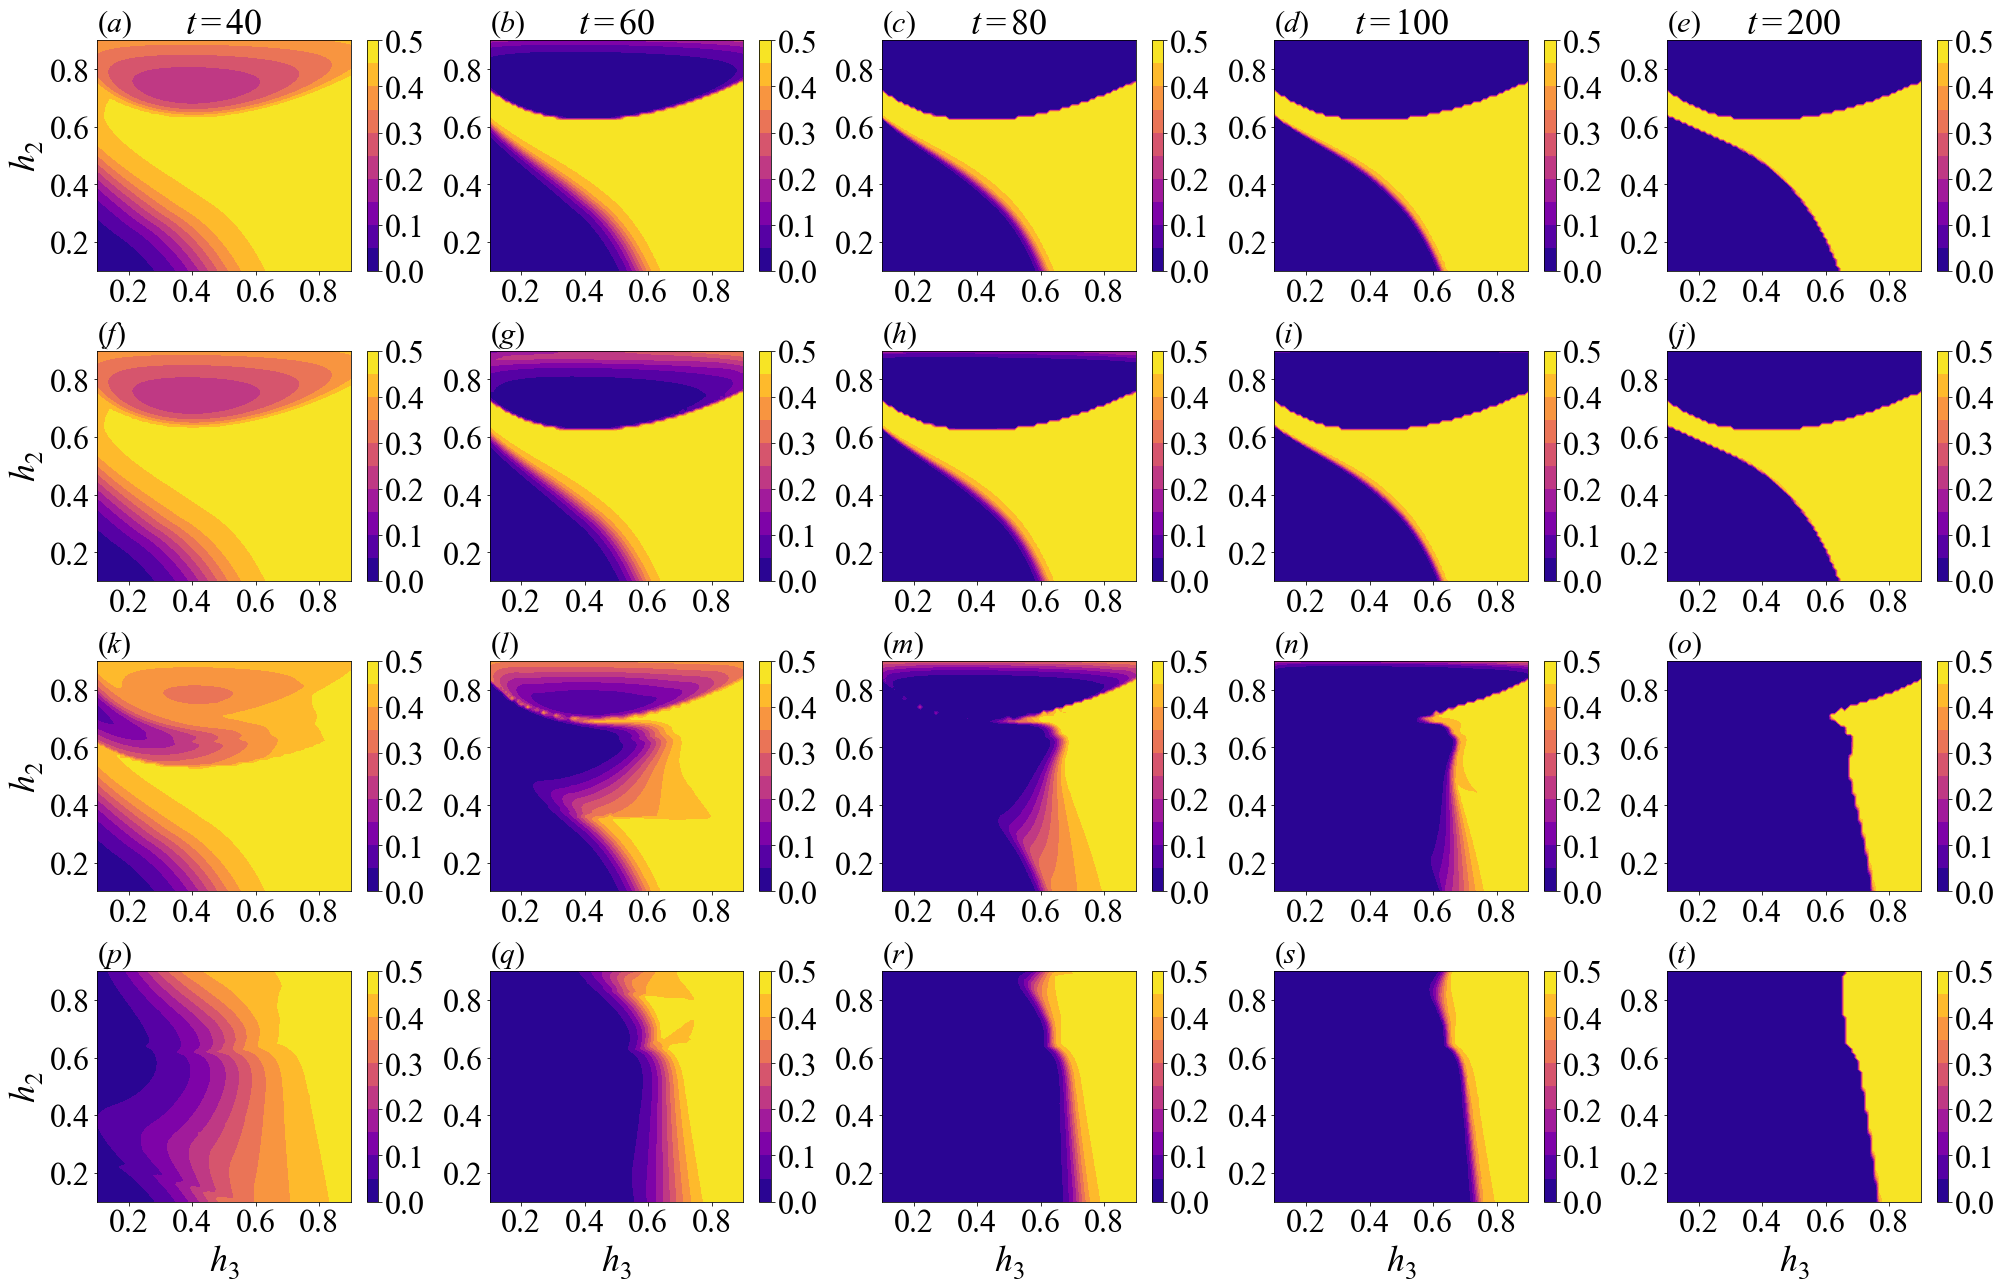

In [22]:
fig = plt.figure(figsize=(28, 18))
gs = gridspec.GridSpec(4, 5, width_ratios=[1, 1, 1, 1, 1], height_ratios=[1, 1, 1, 1])
titles = [r'$t=40$', r'$t=60$', r'$t=80$', r'$t=100$', r'$t=200$']
labels = 'abcdefghijklmnopqrst'

for idx in range(20):
    ax = fig.add_subplot(gs[idx])
    X, Y = np.meshgrid(heatmaps[idx].columns.astype(float), heatmaps[idx].index.astype(float))
    im = ax.contourf(X, Y, heatmaps[idx].values, levels=np.linspace(0, 0.5, 11), cmap=cm.plasma)
    #im = ax.imshow(heatmaps[idx], vmin=0, vmax=0.3, aspect='auto', origin='lower', cmap=cm.plasma, extent=[0.1, 0.9, 0.1, 0.9])
    if idx // 5 == 3:
        ax.set_xlabel(r'$h_3$', fontsize=36)
    if idx % 5 == 0:
        ax.set_ylabel(r'$h_2$', fontsize=36)
    if idx < 5:
        ax.set_title(titles[idx], fontsize=36)
    ax.set_xticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.tick_params(axis='both', which='major', labelsize=32)
    cbar = fig.colorbar(im, ax=ax, ticks=[0.1*i for i in range(6)])
    cbar.ax.tick_params(labelsize=32)
    ax.text(0, 1.04, '('+r'$\it{'+labels[idx]+r'}$'+')', transform=ax.transAxes, size=30)

plt.tight_layout()
#plt.savefig('./figures/h2h3_pol.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/h2h3_pol.eps', format='eps', bbox_inches='tight')
plt.show()

In [23]:
heatmap1 = pd.DataFrame(index=h_vals, columns=h_vals)
heatmap2 = pd.DataFrame(index=h_vals, columns=h_vals)
heatmap3 = pd.DataFrame(index=h_vals, columns=h_vals)
heatmap4 = pd.DataFrame(index=h_vals, columns=h_vals)

for h2 in h_vals:
    for h3 in h_vals:
        col_name = f"h2_{h2}_h3_{h3}"
        series1 = df_x1_08[col_name]
        series2 = df_x2_08[col_name]
        series3 = df_x3_08[col_name]
        heatmap1.at[h2, h3] = 0.8*series1.iloc[4000] + 0.1*series2.iloc[4000] + 0.1*series3.iloc[4000]
        
        series1 = df_x1_4[col_name]
        series2 = df_x2_4[col_name]
        series3 = df_x3_4[col_name]
        heatmap2.at[h2, h3] = 0.8*series1.iloc[4000] + 0.1*series2.iloc[4000] + 0.1*series3.iloc[4000]

        series1 = df_x1_8[col_name]
        series2 = df_x2_8[col_name]
        series3 = df_x3_8[col_name]
        heatmap3.at[h2, h3] = 0.8*series1.iloc[4000] + 0.1*series2.iloc[4000] + 0.1*series3.iloc[4000]

        series1 = df_x1_10[col_name]
        series2 = df_x2_10[col_name]
        series3 = df_x3_10[col_name]
        heatmap4.at[h2, h3] = 0.8*series1.iloc[4000] + 0.1*series2.iloc[4000] + 0.1*series3.iloc[4000]

heatmap1 = heatmap1.astype(float)
heatmap2 = heatmap2.astype(float)
heatmap3 = heatmap3.astype(float)
heatmap4 = heatmap4.astype(float)

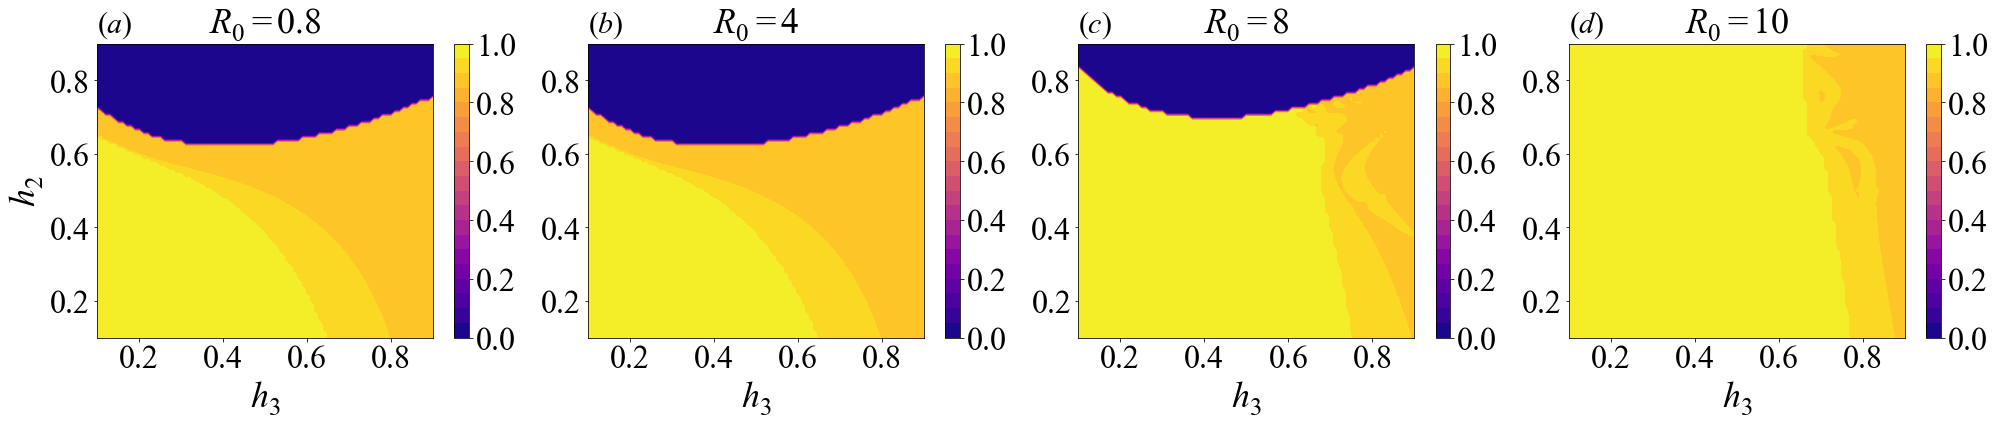

In [24]:
fig = plt.figure(figsize=(28, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 1])
heatmap_final = [heatmap1, heatmap2, heatmap3, heatmap4]
titles = [r'$R_0=0.8$', r'$R_0=4$', r'$R_0=8$', r'$R_0=10$']
labels = 'abcd'

for idx in range(4):
    ax = fig.add_subplot(gs[idx])
    X, Y = np.meshgrid(heatmap_final[idx].columns.astype(float), heatmaps[idx].index.astype(float))
    im = ax.contourf(X, Y, heatmap_final[idx].values, levels=np.linspace(0, 1, 21), cmap=cm.plasma)
    #im = ax.imshow(heatmaps[idx], vmin=0, vmax=0.3, aspect='auto', origin='lower', cmap=cm.plasma, extent=[0.1, 0.9, 0.1, 0.9])
    if idx == 0:
        ax.set_ylabel(r'$h_2$', fontsize=36)
    ax.set_xlabel(r'$h_3$', fontsize=36)
    ax.set_title(titles[idx], fontsize=36)
    ax.set_xticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.tick_params(axis='both', which='major', labelsize=32)
    cbar = fig.colorbar(im, ax=ax, ticks=[0.2*i for i in range(6)])
    cbar.ax.tick_params(labelsize=32)
    ax.text(0, 1.04, '('+r'$\it{'+labels[idx]+r'}$'+')', transform=ax.transAxes, size=30)

plt.tight_layout()
#plt.savefig('./figures/h2h3_pol_pctg_t200.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/h2h3_pol_pctg_t200.eps', format='eps', bbox_inches='tight')
plt.show()